<a href="https://colab.research.google.com/github/Melminmin/Melminmin/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**
As governments around the world have made a commitment to net zero by 2050, governments have to deal with the challenges of climate change and sustainable development. Electric vehicles (EVs) have been seen as an innovation and hope. The wide adoption of EVs represents a critical shift in automotive technology and environmental consciousness. However, public sentiment and discourse surrounding EVs are as dynamic as the technology itself. This project aims to delve into the depths of these discussions, leveraging the repository of user-generated content on Reddit, a popular social media platform.

Through a comprehensive text analysis of Reddit posts and comments from 2018 to 2022, this study seeks to uncover the evolving public sentiment toward EVs. The investigation is not just limited to general perceptions but also extends to specific aspects such as battery technology and recycling since battery is a major component of EVs and the demand for batteries are soaring these days.


## **1.1 Research Question**
This study is guided by three  research questions:
1.    What are the most frequently discussed topics related to EVs?

2.   How has public sentiment towards electric vehicles evolved from 2018 to 2022?

3.   How battery and battery recycling are perceived within the larger conversation about EVs?



## **1.2 Hypothesis**
Hypothesis 1:

Most frequently discussed topics related to EVs should focus on technological advancements.

Hypothesis 2:

The public sentiment towards EVs has become increasingly positive over the years from 2018 to 2022.

Hypothesis 3:
Battery and battery recycling are expected to be hot topics within the discussion and associated with relatively positive emotions.

## **1.3 Significance and Importance to Public Policy:**
The findings of this study hold significant implications for public policy and the automotive industry. Understanding public sentiment and the most discussed topics can inform policymakers and industry leaders about consumer concerns, expectations, and areas requiring more attention or clarification. Moreover, insights into the perceptions surrounding battery technology and recycling can guide environmental policies and strategies for sustainable development in the automotive sector.



# **2. Research Methd Overview**

This section outlines the methodology employed in conducting the study, detailing the data collection, cleaning, sentiment analysis, and topic identification processes. The aim is to provide a clear understanding of the methods used to analyze public sentiment and topics discussed in relation to electric vehicles (EVs) on Reddit from 2018 to 2022.



## **2.1 Data Collection**
Data was collected from Reddit, a popular social media platform known for its rich, user-generated content. The Reddit is chosen due to its characteristic of users' anonymosity, enabling more authenticate feelings. The extraction was performed using Reddit's API and the Python Reddit API Wrapper (PRAW) package. This approach allowed for an efficient and systematic retrieval of posts and comments related to EVs, spanning a period from 2018 to 2022.

## **2.2 Data Preprocessing (Cleaning)**
The raw data collected was subjected to a series of preprocessing steps. This included cleaning and standardizing the data to remove irrelevant content. The focus was narrowed down to exclusively analyze "EV" related posts first. Then, parent comments were extracted, using specific keywords of EV to filter and identify the relevant discussions. This step was crucial in ensuring the quality and relevance of the data for subsequent analysis.

## **2.3 Sentiment Analysis**
Sentiment analysis was conducted on the parent comments. Each comment was assigned a sentiment score, reflecting the underlying emotion or opinion expressed by the user. The average sentiment score was calculated for each year, providing a year-on-year comparison of public sentiment towards EVs from 2018 to 2022. This analysis offered insights into the evolving perceptions and attitudes of the public over time.

## **2.4 Topic Identification**
To identify the most frequently discussed topics, a word cloud was generated. This visual representation highlighted the top topics mentioned in the parent comments over the years, with word frequency serving as a key indicator. The word cloud provided a quick and effective means to visualize the most prominent themes in the discourse.

## **2.5 Focus on Battery and Recycling**
Given the increasing importance of batteries in the EV ecosystem and the increasing demand for critical minerals vital to battery production, a further analysis was conducted focusing on battery and battery recycling. Comments specifically related to these topics were extracted from the parent comments. The same sentiment analysis procedure was applied to these comments to gauge public opinion and sentiment regarding battery technology and recycling practices. This aspect of the study aimed to shed light on the public's perception of these critical components in the context of EVs.


# **3. Data Process and Analysis**

This section delves into the detailed processes and methodologies employed in the data analysis phase of the study. It comprehensively presents the coding procedures, the tools used, and the interpretation of the outputs derived from the analysis.

## **3.1 Extract Top Posts and Determine Posts Topics**

The code begins by installing the 'praw' package, which is a Python wrapper for the Reddit API. The use of PRAW and Reddit API provide a systematic and efficient way to access a large volume of user-generated content on Reddit. By using an API, the process becomes automated and more reliable compared to manual extraction. I set up the Reddit API credentials with client_id, client_secret, and user_agent. These credentials are necessary to authenticate our requests to Reddit's servers.



In [2]:
!pip install praw
import praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.2 MB/s eta 0:00:00


In [3]:
import re
import datetime
import pandas as pd

In [4]:
# Set up reddit API

reddit = praw.Reddit(
    client_id='I6wuIxBUS_9p_8bX2ehHsQ',
    client_secret='kX0qVcj-OzdhqZqAvzSaWXu2Ea1Dwg',
    user_agent='Final_Project by u/melanie_min'
)


In [5]:
import logging
logging.getLogger('praw').setLevel(logging.ERROR)  # Only show errors, not warnings



### **Ectract Top Posts**
As I focus on EV related topics, I decided to narrow down the data scope to the 'RenewableEnergy' subreddit, a hub for discussions related to renewable energy, including electric vehicles (EVs).

Further, a list of keywords related to electric vehicles, like "electric vehicle", "EV", "electric car", etc., is defined. These keywords help in filtering and extracting posts specifically related to EVs.

The next step is to fetch and filter posts. Using subreddit.search() function of PRAW, the code retrieve all posts from the subreddit that match the defined keywords, sorted by their popularity ('top'). Each post is stored in a dictionary (all_posts), keyed by their unique ID to avoid duplicates. Lastly, I created a posts_df dataframe to store all posts in columns of the Year, Title, Score, URL, and Post ID.

In [6]:
# Define the subreddit
subreddit = reddit.subreddit('RenewableEnergy')


# Keywords related to electric vehicles
keywords = ["electric vehicle", "electric vehicles", "EV", "EVs", "electric car", "electric cars", "e-vehicle", "e-vehicles", "green vehicle", "green vehicles", "green car", "green cars"]

In [7]:
# Function to check if a post falls within a specific year
def is_post_in_year(post, year):
    post_date = datetime.datetime.utcfromtimestamp(post.created_utc)
    return post_date.year == year


In [8]:
# Fetch a larger set of posts

all_posts = {}
for keyword in keywords:
    for post in subreddit.search(keyword, sort='top'):
        all_posts[post.id] = post  # Store posts by unique ID to avoid duplicates

# Create a DataFrame to store top posts
columns = ['Year', 'Title', 'Score', 'URL', 'Post ID']
posts_df = pd.DataFrame(columns=columns)

for year in range(2018, 2023):
    yearly_posts = [post for post in all_posts.values() if is_post_in_year(post, year)]

    # Temporary list to hold DataFrame rows
    temp_data = []
    for post in yearly_posts:
        temp_data.append({
            'Year': year,
            'Title': post.title,
            'Score': post.score,
            'URL': f"https://www.reddit.com{post.permalink}",
            'Post ID': post.id
        })


    posts_df = pd.concat([posts_df, pd.DataFrame(temp_data)], ignore_index=True)


#### **Observe the Dataframe of Extracted Posts**

Upon reviewing the following output of posts_df, it becomes evident that the dataset comprises a total of ***163*** posts spanning a five-year period from 2018 to 2023. This volume of data, while valuable, falls short of initial expectations. The anticipated quantity of posts was higher, considering the increasing global interest in electric vehicles (EVs) and the corresponding discussions in online communities.

I've observed that a large portion of posts primarily consist of sharing news articles. To gain a deeper understanding, I decided to explore the specific proportions of user-generated content versus direct news sharing. Additionally, I am interested in identifying the topics that users are most inclined to share.



In [64]:
posts_df

,Year,Title,Score,URL,Post ID,processed_titles
0,2018,Democrats Release Infrastructure Plan With $80...,222,https://www.reddit.com/r/RenewableEnergy/comme...,82yf58,"[democrat, release, infrastructure, plan, 80, ..."
1,2018,"In California, electric vehicles now make up 1...",197,https://www.reddit.com/r/RenewableEnergy/comme...,9xf9w3,"[california, make, 10, new, sold]"
2,2018,"Lyft commits to 100% renewable energy, full ca...",126,https://www.reddit.com/r/RenewableEnergy/comme...,9f3hch,"[lyft, commits, 100, renewable, energy, full, ..."
3,2018,Scottish scientists make revolutionary battery...,129,https://www.reddit.com/r/RenewableEnergy/comme...,9792sk,"[scottish, scientist, make, revolutionary, bat..."
4,2018,China Could Be The World's First All Electric ...,89,https://www.reddit.com/r/RenewableEnergy/comme...,82gjdl,"[china, could, world, first, ecosystem, chines..."
...,...,...,...,...,...,...
158,2022,How the climate bill could save you money on e...,123,https://www.reddit.com/r/RenewableEnergy/comme...,wj8gou,"[climate, bill, could, save, money, electricit..."
159,2022,Toshiba working on a copper plus silicon solar...,69,https://www.reddit.com/r/RenewableEnergy/comme...,rwns7c,"[toshiba, working, copper, plus, silicon, sola..."
160,2022,"Solar carport nears completion, city receives ...",44,https://www.reddit.com/r/RenewableEnergy/comme...,smv3ct,"[solar, carport, nears, completion, city, rece..."
161,2022,Question about hydrogen fueled vehicles?,4,https://www.reddit.com/r/RenewableEnergy/comme...,v63sro,"[question, hydrogen, fueled]"


### **Determine Posts Feature -- Sources and Topics**


I created a new data frame to add the external link column to analyze the proportion of user-generated content and article sharing. Extracting names of media outlets from external links can also determine what are the most referred media organizations in this subreddit.

#### **Observe the Pattern of Posts**

A notable pattern emerged from the analysis of these posts. Users predominantly share news articles about EVs directly from media websites in the 'RenewableEnergy' subreddit. Thus, I decided to count how many posts are self-generated content and how many are only sharing. **It turns out that while only 16 posts are self-generated content over 5 years, 147 posts are purely sharing news articles.** This trend reflects a key aspect of user behavior on the platform: users often act as curators of information, selecting and sharing content that resonates with their interests or aligns with the community's focus.

This pattern of sharing third-party media articles indicates that the 'RenewableEnergy' subreddit serves more as a platform for disseminating existing news rather than generating original user discussions or content. Consequently, the posts predominantly represent the users' interests in highlighting specific aspects of EVs, such as advancements in technology, policy changes, or environmental impacts.

The analysis of these posts, therefore, provides insight not only into the topics that are most relevant or pressing in the Reddit users' eye but also into the nature of online discourse surrounding EVs. The reliance on external news sources suggests that the subreddit members value information from established media, potentially viewing these sources as more credible or authoritative.

In [76]:
posts_urls_columns = ['Year', 'Title', 'Score', 'URL', 'External Link', 'Post ID']
posts_urls_df = pd.DataFrame(columns=posts_urls_columns)

for year in range(2018, 2023):
    yearly_posts = [post for post in all_posts.values() if is_post_in_year(post, year)]

    # Temporary list to hold DataFrame rows
    temp_data_1 = []
    for post in yearly_posts:
        temp_data_1.append({
            'Year': year,
            'Title': post.title,
            'Score': post.score,
            'URL': f"https://www.reddit.com{post.permalink}",
            'External Link': post.url,  # Adding the external link
            'Post ID': post.id
        })

    posts_urls_df = pd.concat([posts_urls_df, pd.DataFrame(temp_data_1)], ignore_index=True)

posts_urls_df

,Year,Title,Score,URL,External Link,Post ID
0,2018,Democrats Release Infrastructure Plan With $80...,222,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.greentechmedia.com/articles/read/d...,82yf58
1,2018,"In California, electric vehicles now make up 1...",197,https://www.reddit.com/r/RenewableEnergy/comme...,https://qz.com/1465465/in-california-electric-...,9xf9w3
2,2018,"Lyft commits to 100% renewable energy, full ca...",126,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.smartcitiesdive.com/news/lyft-rene...,9f3hch
3,2018,Scottish scientists make revolutionary battery...,129,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.huffingtonpost.co.uk/entry/electri...,9792sk
4,2018,China Could Be The World's First All Electric ...,89,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.forbes.com/sites/salvatorebabones/...,82gjdl
...,...,...,...,...,...,...
158,2022,How the climate bill could save you money on e...,123,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.cnn.com/2022/08/06/politics/tax-cr...,wj8gou
159,2022,Toshiba working on a copper plus silicon solar...,69,https://www.reddit.com/r/RenewableEnergy/comme...,https://solarbuildermag.com/news/toshiba-inche...,rwns7c
160,2022,"Solar carport nears completion, city receives ...",44,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.leducrep.com/driving/solar-car-por...,smv3ct
161,2022,Question about hydrogen fueled vehicles?,4,https://www.reddit.com/r/RenewableEnergy/comme...,https://www.reddit.com/r/RenewableEnergy/comme...,v63sro


In [77]:
from urllib.parse import urlparse
import pandas as pd

# Assuming posts_urls_df is your existing DataFrame with an 'External Link' column

# Function to extract base domain
def get_base_domain(url):
    parsed_url = urlparse(url)
    # Extracting the domain and cleaning it to get a more recognizable organization name
    domain = '{uri.netloc}'.format(uri=parsed_url).replace('www.', '').split('.')[0]
    return domain

# Apply the function to the DataFrame
posts_urls_df['News Organization'] = posts_urls_df['External Link'].apply(get_base_domain)

# Count the frequency of each news organization
news_org_freq = posts_urls_df['News Organization'].value_counts()


# Convert Series to DataFrame for better display
news_org_freq_df = news_org_freq.reset_index()
news_org_freq_df.columns = ['News Organization', 'Frequency']



In [78]:
news_org_freq_df

,News Organization,Frequency
0,reddit,16
1,electrek,13
2,bloomberg,6
3,theguardian,5
4,reuters,5
...,...,...
85,sonomotors,1
86,frontpagelive,1
87,evannex,1
88,sierraclub,1


#### **Determine the Popular News Sources**

The following bar chart provides a straightforward display of the frequency of top news organizations.


"[R]eddit" extracted from External Link represents the user's self-generated content. In addition to Reddit, during the selection period, **Electrek and Bloomberg, the Guardian, Reuters, and Cleantechnica** were the top 5 news outlets shared by users. The prominence of those sources suggests that the community has a preference towards big news outlet and values a mix of specialized, business-focused, and general news perspectives in shaping their understanding and discussions about EVs.


Despite the clear inclination towards sharing existing news articles, it is crucial to consider all 163 posts for a comprehensive sentiment analysis. Because it allows for a holistic understanding of the community's perspectives, encompassing both original thoughts and reactions to external content.

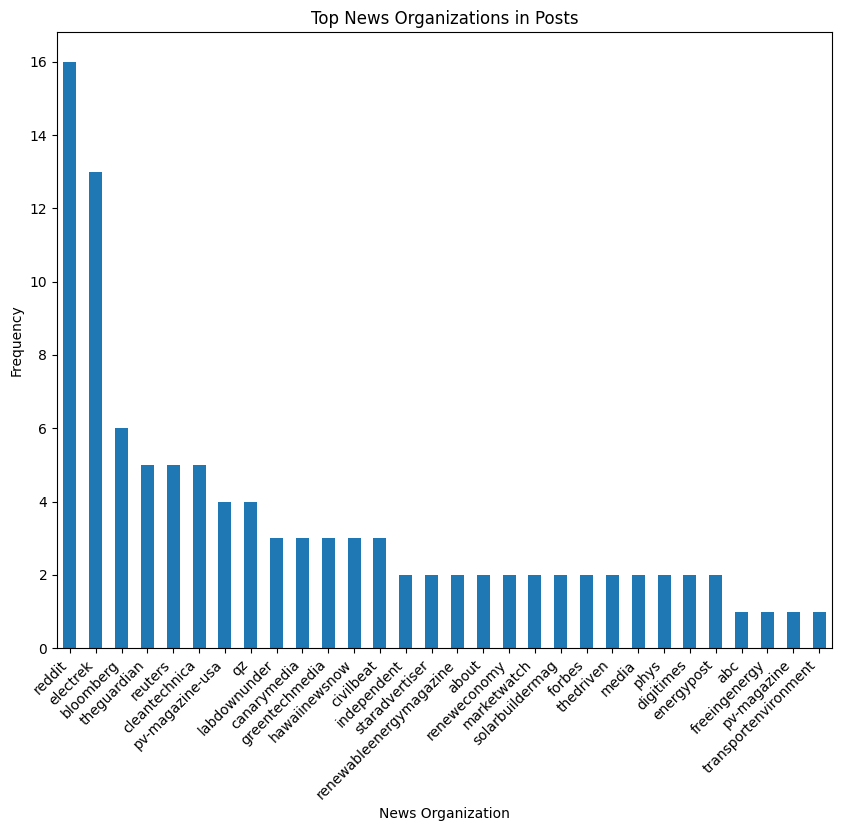

In [79]:
import matplotlib.pyplot as plt
top_news_org = news_org_freq.head(30)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size as needed for better readability
top_news_org.plot(kind='bar')
plt.title('Top News Organizations in Posts')
plt.xlabel('News Organization')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()


#### **Determine the Popular Posts Topics**

The following implemented a text preprocessing routine for the titles of EV related posts. The process involves converting text to lowercase, removing punctuation, tokenizing the text into words, filtering out common stopwords, and applying lemmatization to bring words to their base form. Additionally, **specific EV-related terms are excluded** to focus on more contextual information in the titles.

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


ev_related_terms = {'electric', 'vehicle', 'ev', 'car', 'cars', 'vehicles', 'electrics', 'evs'}


def preprocess(text):
    # Lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Tokenization
    tokens = text.split()

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Exclude EV-related terms
    tokens = [word for word in tokens if word not in ev_related_terms]

    return tokens



# Apply preprocessing to your titles
posts_df['processed_titles'] = posts_df['Title'].apply(preprocess)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
posts_df

,Year,Title,Score,URL,Post ID,processed_titles
0,2018,Democrats Release Infrastructure Plan With $80...,222,https://www.reddit.com/r/RenewableEnergy/comme...,82yf58,"[democrat, release, infrastructure, plan, 80, ..."
1,2018,"In California, electric vehicles now make up 1...",197,https://www.reddit.com/r/RenewableEnergy/comme...,9xf9w3,"[california, make, 10, new, sold]"
2,2018,"Lyft commits to 100% renewable energy, full ca...",126,https://www.reddit.com/r/RenewableEnergy/comme...,9f3hch,"[lyft, commits, 100, renewable, energy, full, ..."
3,2018,Scottish scientists make revolutionary battery...,129,https://www.reddit.com/r/RenewableEnergy/comme...,9792sk,"[scottish, scientist, make, revolutionary, bat..."
4,2018,China Could Be The World's First All Electric ...,89,https://www.reddit.com/r/RenewableEnergy/comme...,82gjdl,"[china, could, world, first, ecosystem, chines..."
...,...,...,...,...,...,...
158,2022,How the climate bill could save you money on e...,123,https://www.reddit.com/r/RenewableEnergy/comme...,wj8gou,"[climate, bill, could, save, money, electricit..."
159,2022,Toshiba working on a copper plus silicon solar...,69,https://www.reddit.com/r/RenewableEnergy/comme...,rwns7c,"[toshiba, working, copper, plus, silicon, sola..."
160,2022,"Solar carport nears completion, city receives ...",44,https://www.reddit.com/r/RenewableEnergy/comme...,smv3ct,"[solar, carport, nears, completion, city, rece..."
161,2022,Question about hydrogen fueled vehicles?,4,https://www.reddit.com/r/RenewableEnergy/comme...,v63sro,"[question, hydrogen, fueled]"


##### **The Popular Post Topics over 5 years**

I applied a topic modeling Latent Dirichlet Allocation (LDA) to analyze the processed titles of Reddit posts to help identify the main themes or topics present in my dataset.

Firstly, I created a 'dictionary' and a 'corpus' from the processed titles. The dictionary maps each unique word to an integer, while the corpus converts the processed titles into a bag-of-words format, which is a collection of word frequencies in your documents.

I set up and run the LDA model using the Gensim library. The model is configured to identify a specified number of topics (num_topics), and it iterates over the data (passes) to improve its accuracy.

It outputs a set of topics, each represented by a collection of words that are most relevant to that topic, giving a high-level overview of the themes prevalent and providing insights into the key areas of discussion within the Reddit posts related to EVs. **It is observed that "battery", "energy", and "charging" are top words across 5 topics.**

Notably, I set random seed to ensure that the random processes within the LDA algorithm start from the same point each time, leading to more reproducible results.

In [82]:
from gensim.models.ldamodel import LdaModel
from gensim import corpora

np.random.seed(100)
random.seed(100)

# Create a dictionary
dictionary = corpora.Dictionary(posts_df['processed_titles'])

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in posts_df['processed_titles']]


# Set parameters
num_topics = 5
passes = 50

# Apply LDA
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

# View the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.016*"new" + 0.012*"year" + 0.010*"million" + 0.010*"charge" + 0.010*"china" + 0.010*"market" + 0.007*"hawaii" + 0.007*"charging" + 0.007*"last" + 0.006*"sale"
Topic: 1 
Words: 0.027*"battery" + 0.021*"energy" + 0.013*"power" + 0.011*"could" + 0.009*"solar" + 0.006*"fuel" + 0.006*"per" + 0.006*"used" + 0.006*"solidstate" + 0.006*"year"
Topic: 2 
Words: 0.014*"energy" + 0.014*"battery" + 0.010*"grid" + 0.009*"u" + 0.009*"storage" + 0.009*"year" + 0.008*"sale" + 0.007*"hydrogen" + 0.007*"renewables" + 0.007*"emission"
Topic: 3 
Words: 0.018*"charging" + 0.016*"solar" + 0.012*"new" + 0.010*"energy" + 0.009*"battery" + 0.008*"station" + 0.008*"grid" + 0.007*"electricity" + 0.007*"per" + 0.007*"could"
Topic: 4 
Words: 0.013*"charging" + 0.012*"u" + 0.011*"solar" + 0.011*"bus" + 0.009*"sale" + 0.008*"fleet" + 0.008*"world" + 0.008*"time" + 0.008*"million" + 0.008*"station"


##### **The Popular Post Topics of each Year and Comparison**
The following generated topic modeling for each year to see how topics has evolved from 2018 to 2022.


Additionally, I summed weights across topics of each year to analyze several topics that the LDA model has identified for that year's data. A specific word might appear in multiple topics, with different weights in each topic. To understand the overall importance of this word in the entire year's discussion, I sum up its weights across all topics. This summed weight represents how prominently the word features in all topics of that year, providing a measure of its overall significance. 5 heatmaps that list key words in a sequence of high weight to low weight are also displayed at a row to compare the theme of posts.

Top Words Across Topics by Year

2018: 1. energy,  2. battery,  3. billion,  4. plan,     5. world

2019: 1. u,       2. energy,   3. new,      4. hawaii,   5. state

2020: 1. battery, 2. grid,     3. bus,      4. farm,     5. energy

2021: 1. battery, 2. solar,    3. sale,     4. year,     5. charging

2022: 1. energy,  2. charging, 3. biden,    4. solar,    5. sale

It is evident that **the significance of battery and charging has increased over the years. Energy and grid also appeared as a top theme over the years. **Especially specific energy of **solar was discussed more frequently** in the years 2021 and 2022. **Biden also became a heated topic in 2022**, the only political figure to have such a weight over 5 years.

In [83]:
import numpy as np
import random
from gensim.models.ldamodel import LdaModel

# Set a fixed seed for reproducibility
np.random.seed(100)
random.seed(100)

years = posts_df['Year'].unique()  # Get all unique years
posts_by_year = {year: posts_df[posts_df['Year'] == year] for year in years}  # Create a dictionary with data for each year

# Assuming the preprocess function is already defined
for year, df in posts_by_year.items():
    df['processed_titles'] = df['Title'].apply(preprocess)
    posts_by_year[year] = df


num_topics = 5  # Change this based on your needs
passes = 50

topics_by_year = {}

for year, df in posts_by_year.items():
    # Create a dictionary
    dictionary = corpora.Dictionary(df['processed_titles'])

    # Create a corpus
    corpus = [dictionary.doc2bow(text) for text in df['processed_titles']]

    # Apply LDA
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)  # Adjust num_topics and passes as needed

    # Save the topics
    topics_by_year[year] = lda_model.print_topics(-1)

for year, topics in topics_by_year.items():
    print(f"Topics for {year}:")
    for idx, topic in topics:
        print(f'Topic {idx}: {topic}')
    print("\n")


<ipython-input-83-c8936cacce5b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_titles'] = df['Title'].apply(preprocess)


Topics for 2018:
Topic 0: 0.020*"year" + 0.020*"china" + 0.013*"million" + 0.013*"per" + 0.013*"least" + 0.013*"market" + 0.013*"one" + 0.013*"country" + 0.013*"billion" + 0.013*"energy"
Topic 1: 0.020*"u" + 0.014*"higher" + 0.014*"oil" + 0.014*"battery" + 0.008*"renewables" + 0.008*"10" + 0.008*"power" + 0.008*"charge" + 0.008*"may" + 0.008*"faster"
Topic 2: 0.028*"energy" + 0.028*"solar" + 0.015*"plan" + 0.015*"tesla" + 0.015*"drive" + 0.015*"grid" + 0.015*"new" + 0.015*"mile" + 0.015*"enough" + 0.015*"smart"
Topic 3: 0.016*"charging" + 0.016*"plan" + 0.016*"battery" + 0.016*"ford" + 0.016*"fully" + 0.016*"liquid" + 0.009*"make" + 0.009*"government" + 0.009*"model" + 0.009*"hybrid"
Topic 4: 0.030*"world" + 0.018*"using" + 0.018*"billion" + 0.018*"could" + 0.018*"battery" + 0.018*"energy" + 0.013*"save" + 0.013*"storage" + 0.013*"km" + 0.013*"rest"


Topics for 2019:
Topic 0: 0.025*"u" + 0.025*"fleet" + 0.014*"solar" + 0.014*"power" + 0.014*"energy" + 0.014*"system" + 0.014*"produced"

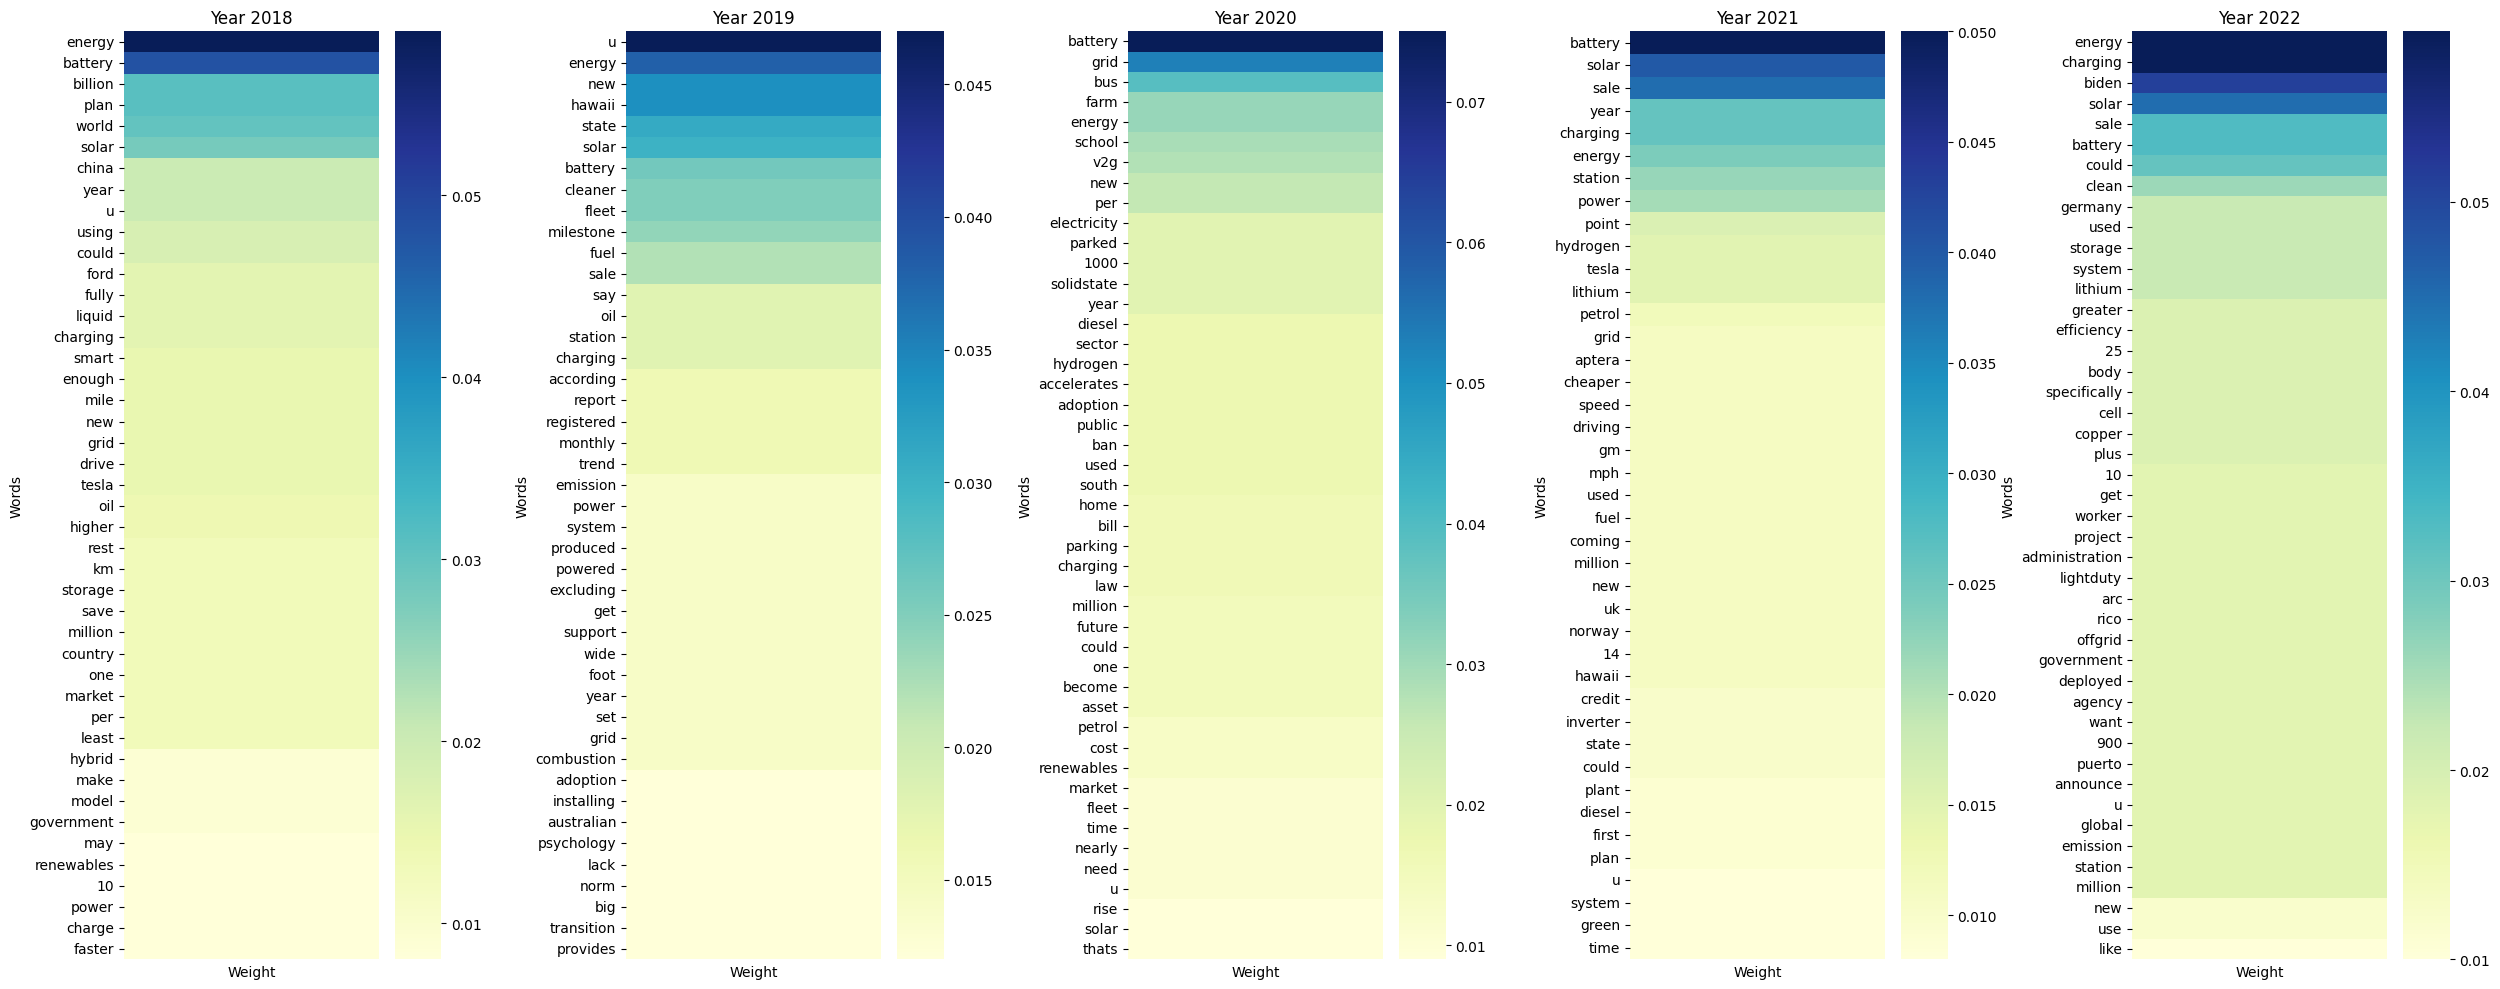

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

# Number of years to plot
num_years = len(topics_by_year)
fig, axes = plt.subplots(1, num_years, figsize=(num_years * 5, 10))  # Adjust the figure size as needed

for i, (year, topics) in enumerate(topics_by_year.items()):
    word_weights = defaultdict(float)

    for _, topic in topics:
        for word_weight in topic.split(' + '):
            weight, word = word_weight.split('*')
            word = word.strip().strip('"')
            word_weights[word] += float(weight)

    year_df = pd.DataFrame(list(word_weights.items()), columns=['Word', 'Weight']).set_index('Word').sort_values(by='Weight', ascending=False)

    # Plot heatmap
    ax = axes[i]
    sns.heatmap(year_df, annot=False, cmap='YlGnBu', xticklabels=False, ax=ax, cbar=True)
    ax.set_title(f'Year {year}')
    ax.set_ylabel('Words')
    ax.set_xlabel('Weight')

    # Find and mark the highest weight
    max_weight = year_df['Weight'].max()
    max_word = year_df['Weight'].idxmax()
    max_index = year_df.index.tolist().index(max_word)


plt.tight_layout()
plt.show()




## **3.2 Extract Parent Comments and Clean Comments**

The following process consists of two main parts: fetching comments and cleaning the text.

Fetching Comments:

A function get_parent_comments is defined to extract the top-level comments (parent comments) from each Reddit post. This function retrieves all comments from each post. I then iterate over the rows of the posts_df DataFrame, using the post IDs to fetch the actual Reddit submissions. For each submission, I extract the parent comments and compile them along with the corresponding post information (like the year, title, and URL) into a list of dictionaries, and transform into a dataframe comments_df.




Cleaning Text Data:

To preprocess the comments, a clean_text function is defined. This function performs several cleaning operations: converting text to lowercase, removing URLs, HTML tags, text in brackets, punctuation, newline characters, words containing numbers, and stopwords.
I apply this cleaning function to each parent comment in the dataset. The cleaned comments are then stored in a new DataFrame, cleaned_comment_df, alongside the original comment and associated post information.

In [85]:
def get_parent_comments(post, limit=5):
    post.comments.replace_more(limit=0)  # Load all top-level comments, no "load more comments"
    return [comment.body for comment in post.comments[:limit]]  # Get top-level comments only



all_comments_data = []

# Fetch and store parent comments for each post, along with corresponding post information
for index, row in posts_df.iterrows():
    post = reddit.submission(id=row['Post ID'])
    parent_comments = get_parent_comments(post)

    for comment in parent_comments:
        comment_data = {
            'Year': row['Year'],
            'Post Title': row['Title'],
            'Post URL': row['URL'],
            'Parent Comment': comment
        }
        all_comments_data.append(comment_data)

# Convert the list of dictionaries to a DataFrame
comments_df = pd.DataFrame(all_comments_data)

comments_df

,Year,Post Title,Post URL,Parent Comment
0,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,"They need to reverse all of that bill, and more."
1,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Are we going to write a blank check to energy ...
2,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Maybe this isn't the sub or discussion for thi...
3,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,">""paid for by reversing parts of the Republica..."
4,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Personally I'd rather just keep more of my mon...
...,...,...,...,...
490,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Primary difficulty is efficiency.\n\nThere's f...
491,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Spend a couple of weeks on a hydrogen dedicate...
492,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,You could imagine if you placed water in a bla...
493,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,I heat my kiddy pool with a length of hose (ab...


In [86]:
!pip install nltk
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation and special chars
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with space
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text



# Create a list to store all cleaned comment data
all_cleaned_comments_data = []

# Iterate over each row in the original comments DataFrame
for index, row in comments_df.iterrows():
    cleaned_comment = clean_text(row['Parent Comment'])
    cleaned_comment_data = {
        'Year': row['Year'],
        'Post Title': row['Post Title'],
        'Post URL': row['Post URL'],
        'Parent Comment': row['Parent Comment'],
        'Cleaned Comment': cleaned_comment
    }
    all_cleaned_comments_data.append(cleaned_comment_data)

# Convert the list of dictionaries to a DataFrame
cleaned_comment_df = pd.DataFrame(all_cleaned_comments_data)
cleaned_comment_df


,Year,Post Title,Post URL,Parent Comment,Cleaned Comment
0,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,"They need to reverse all of that bill, and more.",need reverse bill
1,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Are we going to write a blank check to energy ...,going write blank check energy companies like ...
2,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Maybe this isn't the sub or discussion for thi...,maybe isnt sub discussion many seems like bill...
3,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,">""paid for by reversing parts of the Republica...",paid reversing parts republican tax bill isnt ...
4,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Personally I'd rather just keep more of my mon...,personally id rather keep money tax cuts revok...
...,...,...,...,...,...
490,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Primary difficulty is efficiency.\n\nThere's f...,primary difficulty efficiency theres far high ...
491,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Spend a couple of weeks on a hydrogen dedicate...,spend couple weeks hydrogen dedicated sub like...
492,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,You could imagine if you placed water in a bla...,could imagine placed water black box itd heat ...
493,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,I heat my kiddy pool with a length of hose (ab...,heat kiddy pool length hose roof supplying fre...


## **3.3 Sentiment Analysis: Sentiment Score of Comments by Year**

The following code blocks make up three parts:


Sentiment Analysis Setup:

The code uses the Natural Language Toolkit (nltk) with the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. VADER is specifically tuned for social media text and provides a compound sentiment score ranging from -1 (very negative) to +1 (very positive).



Calculating Sentiment Scores:

A function get_sentiment_score is defined to calculate the sentiment score for each cleaned comment using VADER. I iterate through each row in the cleaned_comment_df DataFrame, applying this function to obtain the sentiment score of each comment. This data, along with other details like the year, post title, URL, and the original and cleaned comments, is stored in a new DataFrame, sentiment_df.


Aggregating and Plotting Sentiment Scores:

The sentiment scores are aggregated by year to calculate the average sentiment score for each year. This gives a yearly perspective on the general sentiment towards electric vehicles.Finally, these average yearly sentiment scores are plotted using matplotlib to visualize the trend over the years from 2018 to 2022.


\





Interpretation of the Final Sentiment Score Table:

The table shows the average sentiment scores for each year from 2018 to 2022.
There is a general upward trend in sentiment scores from 2018 (0.156481) to 2020 (0.288824), indicating increasingly positive sentiment towards electric vehicles during this period.
However, there's a slight decrease in sentiment in the following years, with scores dropping to 0.268119 in 2021 and 0.259263 in 2022. This suggests a mild decline in positive sentiment or a rise in neutral/mixed sentiments.
Overall, the sentiment remains positive throughout the years, but the fluctuations indicate changing public opinions or varying intensities of sentiment towards electric vehicles during these years.

In [124]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [125]:
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

In [126]:
sia = SentimentIntensityAnalyzer()



all_sentiment_data = []

# Iterate over each row in the cleaned comments DataFrame
for index, row in cleaned_comment_df.iterrows():
    sentiment_score = get_sentiment_score(row['Cleaned Comment'])
    sentiment_data = {
        'Year': row['Year'],
        'Post Title': row['Post Title'],
        'Post URL': row['Post URL'],
        'Parent Comment': row['Parent Comment'],
        'Cleaned Comment': row['Cleaned Comment'],
        'Sentiment Score': sentiment_score
    }
    all_sentiment_data.append(sentiment_data)

# Convert the list of dictionaries to a DataFrame
sentiment_df = pd.DataFrame(all_sentiment_data)


In [127]:
sentiment_df

,Year,Post Title,Post URL,Parent Comment,Cleaned Comment,Sentiment Score
0,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,"They need to reverse all of that bill, and more.",need reverse bill,0.0000
1,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Are we going to write a blank check to energy ...,going write blank check energy companies like ...,0.5574
2,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Maybe this isn't the sub or discussion for thi...,maybe isnt sub discussion many seems like bill...,0.9231
3,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,">""paid for by reversing parts of the Republica...",paid reversing parts republican tax bill isnt ...,0.0000
4,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Personally I'd rather just keep more of my mon...,personally id rather keep money tax cuts revok...,0.7717
...,...,...,...,...,...,...
490,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Primary difficulty is efficiency.\n\nThere's f...,primary difficulty efficiency theres far high ...,-0.3818
491,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Spend a couple of weeks on a hydrogen dedicate...,spend couple weeks hydrogen dedicated sub like...,0.6705
492,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,You could imagine if you placed water in a bla...,could imagine placed water black box itd heat ...,0.6486
493,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,I heat my kiddy pool with a length of hose (ab...,heat kiddy pool length hose roof supplying fre...,0.8074


In [128]:
# Calculate average sentiment score for each year
average_sentiment_by_year = sentiment_df.groupby('Year')['Sentiment Score'].mean().reset_index()
average_sentiment_by_year


,Year,Sentiment Score
0,2018,0.156481
1,2019,0.229898
2,2020,0.288824
3,2021,0.268119
4,2022,0.259263


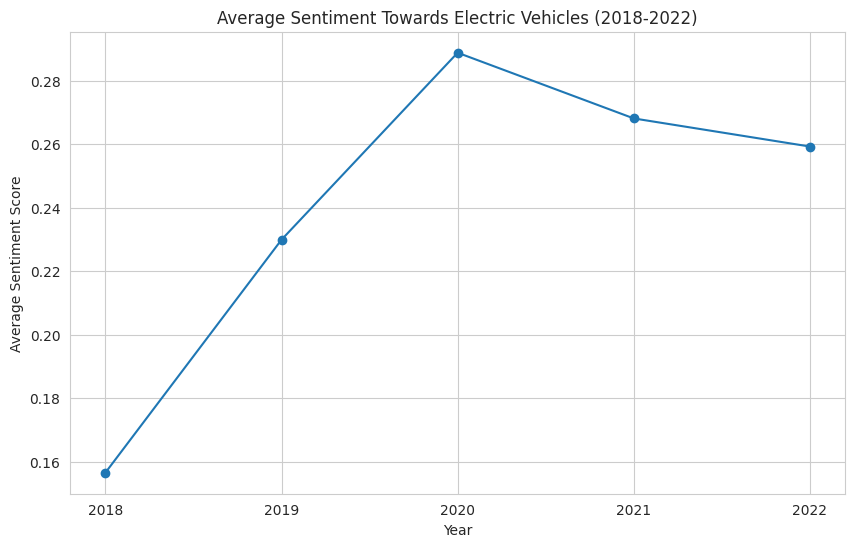

In [129]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_sentiment_by_year['Year'], average_sentiment_by_year['Sentiment Score'], marker='o')
plt.title('Average Sentiment Towards Electric Vehicles (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')

# Set x-axis to display each year as a whole number
plt.xticks(average_sentiment_by_year['Year'])

plt.grid(True)
plt.show()


### **Interpret Top Positive and Top Negative Comments Manually**

The next code aims to extract and highlight the top three positive and negative comments for each year from the sentiment_df DataFrame.

It does this by:

Grouping Data by Year:

The DataFrame is grouped based on the 'Year' column. This allows for a yearly analysis of the comments.

Sorting and Selecting Comments:

For each year, comments are sorted by their sentiment score. The top three with the highest scores are deemed the most positive, and the three with the lowest scores are deemed the most negative.
The relevant information (year, post title, URL, sentiment type, comment, and score) for these selected comments is then appended to a results list.
Creating a Results DataFrame: The accumulated results are converted into a new DataFrame, results_df, which makes it easier to analyze and display this subset of data.

\

The output of results_df provides a focused view of the most strongly positive and negative sentiments expressed each year. This can offer insights into the extremes of public opinion on the topic of electric vehicles.


Regarding the comment "Maybe this isn't the sub or discussion for this, but why are so many (seems like all) bills that go to vote seem doomed for being overly ambitious? Given the majority GOP in House and Senate, this seems like a non-starter right now even before it reaches Trump's desk. To me, this move looks like the dems are trying to validate their existence instead of trying to put something together that has a chance to get passed be built on later. I'd rather see a baby step in the right direction than a bunch of heads banging on the wall. There is zero chance that the same people that voted on the tax bill are going to reverse it a month or two later. This looks pretty, but she don't dance" with a positive score of 0.92,


it appears that the sentiment analysis tool might have misinterpreted the tone.  

The comment, while scoring high on positivity, seems to carry a critical or skeptical tone, particularly with the metaphor "This looks pretty, but she don't dance." This phrase likely implies that while something may appear promising or attractive (in this case, a political action or bill), it ultimately lacks substance or effectiveness.



This example highlights a limitation of automated sentiment analysis tools, especially in interpreting complex language features like metaphors or sarcasm. These tools often analyze text based on the presence of certain keywords and their general sentiment connotations but may miss the subtleties of human language, such as irony or nuanced context.

Incorporating the context of the post's content (whether it's user-generated or a shared news article) could help in more accurately determining the sentiment of a comment. This suggests a potential area for improvement in sentiment analysis methods, where understanding the broader context or the content to which the comment is responding could significantly enhance the accuracy of sentiment scoring.








In [130]:
results = []

# Group by 'Year' and process each group
for year, group in sentiment_df.groupby('Year'):
    # Get top 5 positive comments
    top_positive = group.sort_values('Sentiment Score', ascending=False).head(3)
    for _, row in top_positive.iterrows():
        results.append({'Year': year, 'Post Title': row['Post Title'], 'Post URL': row['Post URL'], 'Sentiment': 'Positive', 'Comment': row['Parent Comment'], 'Score': row['Sentiment Score']})

    # Get top 5 negative comments
    top_negative = group.sort_values('Sentiment Score').head(3)
    for _, row in top_negative.iterrows():
        results.append({'Year': year, 'Post Title': row['Post Title'], 'Post URL': row['Post URL'], 'Sentiment': 'Negative', 'Comment': row['Parent Comment'], 'Score': row['Sentiment Score']})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Year,Post Title,Post URL,Sentiment,Comment,Score
0,2018,"In California, electric vehicles now make up 1...",https://www.reddit.com/r/RenewableEnergy/comme...,Positive,If even the low end of recent growth rates hol...,0.9423
1,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Positive,Maybe this isn't the sub or discussion for thi...,0.9231
2,2018,China Could Be The World's First All Electric ...,https://www.reddit.com/r/RenewableEnergy/comme...,Positive,That graph showing Chinese and American electr...,0.9022
3,2018,A small 3.3 kWp-DC solar array provides enough...,https://www.reddit.com/r/RenewableEnergy/comme...,Negative,One of the big things that I think contribute ...,-0.9287
4,2018,Volkswagen reveals nationwide EV charging netw...,https://www.reddit.com/r/RenewableEnergy/comme...,Negative,>A large part of Volkswagen’s emissions scanda...,-0.8665
5,2018,"Drive over 12,000 miles/year in a Tesla Model ...",https://www.reddit.com/r/RenewableEnergy/comme...,Negative,>as long as the PV system lasts longer than 11...,-0.8086
6,2019,China blocks new car factories that don’t make...,https://www.reddit.com/r/RenewableEnergy/comme...,Positive,Just wanted to make one last push for: solar e...,0.9783
7,2019,"2020 set to be year of the electric car, say i...",https://www.reddit.com/r/RenewableEnergy/comme...,Positive,Here’s what needs to happen to enable this:\n\...,0.9776
8,2019,World's 8th largest bank says Big Oil's days a...,https://www.reddit.com/r/RenewableEnergy/comme...,Positive,"While I do hope that solar, wind, and other re...",0.9565
9,2019,"2020 set to be year of the electric car, say i...",https://www.reddit.com/r/RenewableEnergy/comme...,Negative,They need to stop using the cobalt and tungste...,-0.9231


## **3.4 Word Frequency: Top words mentioned in Comments by Year**

### **Tokenize comments and cleaning**


Initially, a function tokenize_comments is used to tokenize the cleaned comments. This involves converting each comment into a list of words, filtering out non-alphabetic characters. The tokenization is applied to each comment in the cleaned_comment_df DataFrame. The resulting tokens, along with other comment details, are stored in a new DataFrame, tokenized_comments_df.

The code then calculates word frequencies for each year using the Counter class from the collections module. This helps in identifying the most common words in the comments for each year.

However, the initial frequency result lists "EV" "Electric" as high-frequency and word like "would" ranks at first, which exerting negative impacts on our observation of the accurate topics within parent comments.

To enhance the analysis, I create an extended_stop_words list that includes standard stopwords, contextual stopwords (common but less meaningful words), and specific EV-related terms. The rationale here is to remove words that are either too common (and thus not insightful) or too specific to EVs (since the focus is on the broader context of discussions). A new function tokenize_comments_extended is defined to tokenize comments while excluding words from the extended_stop_words list.
This updated tokenization is applied to the DataFrame, and the results are stored in a new column 'Cleaned Tokens'.


In [97]:
from nltk.tokenize import word_tokenize
from collections import Counter


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [98]:
def tokenize_comments(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    return tokens


# Temporary list to store data
tokenized_data = []

for index, row in cleaned_comment_df.iterrows():
    tokens = tokenize_comments(row['Cleaned Comment'])
    tokenized_data.append({
        'Year': row['Year'],
        'Post Title': row['Post Title'],
        'Post URL': row['Post URL'],
        'Parent Comment': row['Parent Comment'],
        'Cleaned Comment': row['Cleaned Comment'],
        'Tokens': tokens
    })

# Create a new DataFrame from the tokenized data
tokenized_comments_df = pd.concat([pd.DataFrame(tokenized_data)], ignore_index=True)


In [99]:
tokenized_comments_df

,Year,Post Title,Post URL,Parent Comment,Cleaned Comment,Tokens
0,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,"They need to reverse all of that bill, and more.",need reverse bill,"[need, reverse, bill]"
1,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Are we going to write a blank check to energy ...,going write blank check energy companies like ...,"[going, write, blank, check, energy, companies..."
2,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Maybe this isn't the sub or discussion for thi...,maybe isnt sub discussion many seems like bill...,"[maybe, isnt, sub, discussion, many, seems, li..."
3,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,">""paid for by reversing parts of the Republica...",paid reversing parts republican tax bill isnt ...,"[paid, reversing, parts, republican, tax, bill..."
4,2018,Democrats Release Infrastructure Plan With $80...,https://www.reddit.com/r/RenewableEnergy/comme...,Personally I'd rather just keep more of my mon...,personally id rather keep money tax cuts revok...,"[personally, id, rather, keep, money, tax, cut..."
...,...,...,...,...,...,...
490,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Primary difficulty is efficiency.\n\nThere's f...,primary difficulty efficiency theres far high ...,"[primary, difficulty, efficiency, theres, far,..."
491,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,Spend a couple of weeks on a hydrogen dedicate...,spend couple weeks hydrogen dedicated sub like...,"[spend, couple, weeks, hydrogen, dedicated, su..."
492,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,You could imagine if you placed water in a bla...,could imagine placed water black box itd heat ...,"[could, imagine, placed, water, black, box, it..."
493,2022,Best way to heat up water with the power of th...,https://www.reddit.com/r/RenewableEnergy/comme...,I heat my kiddy pool with a length of hose (ab...,heat kiddy pool length hose roof supplying fre...,"[heat, kiddy, pool, length, hose, roof, supply..."


In [100]:
# Count word frequencies for each year
word_frequencies_by_year = {}

for year in range(2018, 2023):
    yearly_tokens = tokenized_comments_df[tokenized_comments_df['Year'] == year]['Tokens'].sum()
    word_frequencies_by_year[year] = Counter(yearly_tokens)

# Display the top 5 words for each year
for year in word_frequencies_by_year:
    most_common_words = word_frequencies_by_year[year].most_common(100)
    print(f"Year {year}: {most_common_words}")


Year 2018: [('would', 16), ('battery', 15), ('electric', 13), ('like', 12), ('people', 11), ('cars', 11), ('even', 10), ('im', 10), ('charging', 10), ('going', 9), ('need', 8), ('market', 8), ('per', 8), ('thats', 8), ('car', 8), ('much', 7), ('evs', 7), ('years', 7), ('batteries', 7), ('energy', 6), ('see', 6), ('dont', 6), ('good', 6), ('also', 6), ('storage', 6), ('time', 6), ('get', 5), ('id', 5), ('two', 5), ('system', 5), ('investment', 5), ('year', 5), ('big', 5), ('tesla', 5), ('sales', 5), ('gas', 5), ('new', 5), ('one', 5), ('article', 5), ('cost', 5), ('price', 5), ('use', 5), ('way', 5), ('night', 5), ('build', 5), ('work', 4), ('go', 4), ('rather', 4), ('tax', 4), ('pretty', 4), ('money', 4), ('share', 4), ('fast', 4), ('never', 4), ('great', 4), ('percent', 4), ('next', 4), ('install', 4), ('charge', 4), ('grid', 4), ('think', 4), ('power', 4), ('could', 4), ('ev', 4), ('home', 4), ('day', 4), ('industry', 4), ('lower', 4), ('want', 4), ('solar', 4), ('pv', 4), ('still', 

In [101]:
extended_stop_words = stop_words.copy()

contextual_stopwords = ['would', 'could', 'like', 'need', 'going', 'make', 'get', 'made', 'makes', 'put', 'take',
                        'even', 'much', 'also', 'still', 'really', 'less', 'far',
                        'im', 'thats', 'one', 'people', 'things', 'something', 'year','years',
                        'per', 'many', 'more', 'most', 'way', 'thing', 'lot', 'part', 'seems', 'cant','dont']


ev_words = ['electric', 'vehicle', 'vehicles', 'car', 'cars', 'ev', 'evs', 'electrics']


# Add contextual and ev stopwords
extended_stop_words.update(contextual_stopwords)
extended_stop_words.update(ev_words)


# Function to tokenize comments with updated stopwords
def tokenize_comments_extended(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in extended_stop_words]
    return tokens


# Apply tokenization to all cleaned comments
tokenized_comments_df['Cleaned Tokens'] = tokenized_comments_df['Cleaned Comment'].apply(tokenize_comments_extended)

### **Count Word Frequencies, Word Cloud, and Bar Plot**

The following codes recalculates word frequencies and demonstrate the result using 2 types of visualization.

**Recalcuation**:

The code recalculates word frequencies for each year from 2018 to 2023 using the refined token list, 'Cleaned Tokens', from the tokenized_comments_df DataFrame. This involves creating a Counter object for each year to tally the frequencies of the words. For each year, the top 10 most common words are printed out, providing a quick snapshot of the most prevalent terms in the comments for each respective year.

**Visualization 1: Word Cloud**

A function generate_wordcloud is defined to create a word cloud from the word frequencies. This visual representation uses size to indicate the frequency of words, offering an intuitive understanding of the most prominent terms in the dataset. The matplotlib library is used to set up subplots for each year within a single figure. Word clouds for each year from 2018 to 2023 are generated and displayed in their designated subplots. The layout is adjusted for clarity, and an empty subplot is hidden as there are only five years of data.


**Visualization 2: Bar Plot**

Data Preparation for Visualization: It starts by selecting the top 5 most common words for each year from the updated word frequencies. This data is then structured into a list of dictionaries, each containing the year, word, and its frequency. This list is converted into a DataFrame top_words_df for easier manipulation and visualization. Using Seaborn, the code creates bar plots for each year. These plots display the top 5 words and their frequencies. The plots are arranged in a grid layout, making it simple to compare the most frequent words across different years.



**Interpretation of the Output:**
The word cloud, frequency table, and bar plots reveal the top discussion themes in each year. For example, in 2018, words like 'battery', 'charging', and 'market' were prevalent, indicating a focus on the technical aspects of EVs and their market presence. Over the years, the focus seems to shift slightly. In 2019 and 2020, words like 'solar', 'energy', and 'grid' become more common, suggesting discussions broadened to include renewable energy and infrastructure topics. By 2021 and 2022, terms like 'hydrogen', 'storage', and 'efficiency' gain prominence, reflecting a growing interest in alternative energy storage solutions and the efficiency of green technologies application with EV. This trend analysis helps to understand the evolving interests and concerns in the EV community on Reddit, indicating shifts in focus areas and possibly reflecting developments in the EV sector and broader energy context.












In [103]:
# Recompute word frequencies for each year
updated_word_frequencies_by_year = {}

for year in range(2018, 2023):
    yearly_tokens = tokenized_comments_df[cleaned_comment_df['Year'] == year]['Cleaned Tokens'].sum()
    updated_word_frequencies_by_year[year] = Counter(yearly_tokens)


for year in updated_word_frequencies_by_year:
    most_common_words = updated_word_frequencies_by_year[year].most_common(10)
    print(f"Year {year}: {most_common_words}")



Year 2018: [('battery', 15), ('charging', 10), ('market', 8), ('batteries', 7), ('energy', 6), ('see', 6), ('good', 6), ('storage', 6), ('time', 6), ('id', 5)]
Year 2019: [('solar', 18), ('energy', 14), ('charging', 14), ('system', 11), ('power', 11), ('miles', 11), ('gas', 10), ('good', 10), ('long', 9), ('pv', 9)]
Year 2020: [('energy', 17), ('grid', 16), ('hydrogen', 13), ('batteries', 10), ('renewable', 9), ('new', 8), ('cost', 8), ('storage', 8), ('think', 7), ('power', 7)]
Year 2021: [('solar', 34), ('energy', 30), ('power', 21), ('new', 19), ('battery', 17), ('work', 16), ('good', 14), ('used', 13), ('gas', 12), ('want', 12)]
Year 2022: [('hydrogen', 35), ('storage', 22), ('energy', 15), ('efficiency', 15), ('systems', 11), ('battery', 10), ('great', 9), ('solar', 9), ('transport', 9), ('sales', 8)]


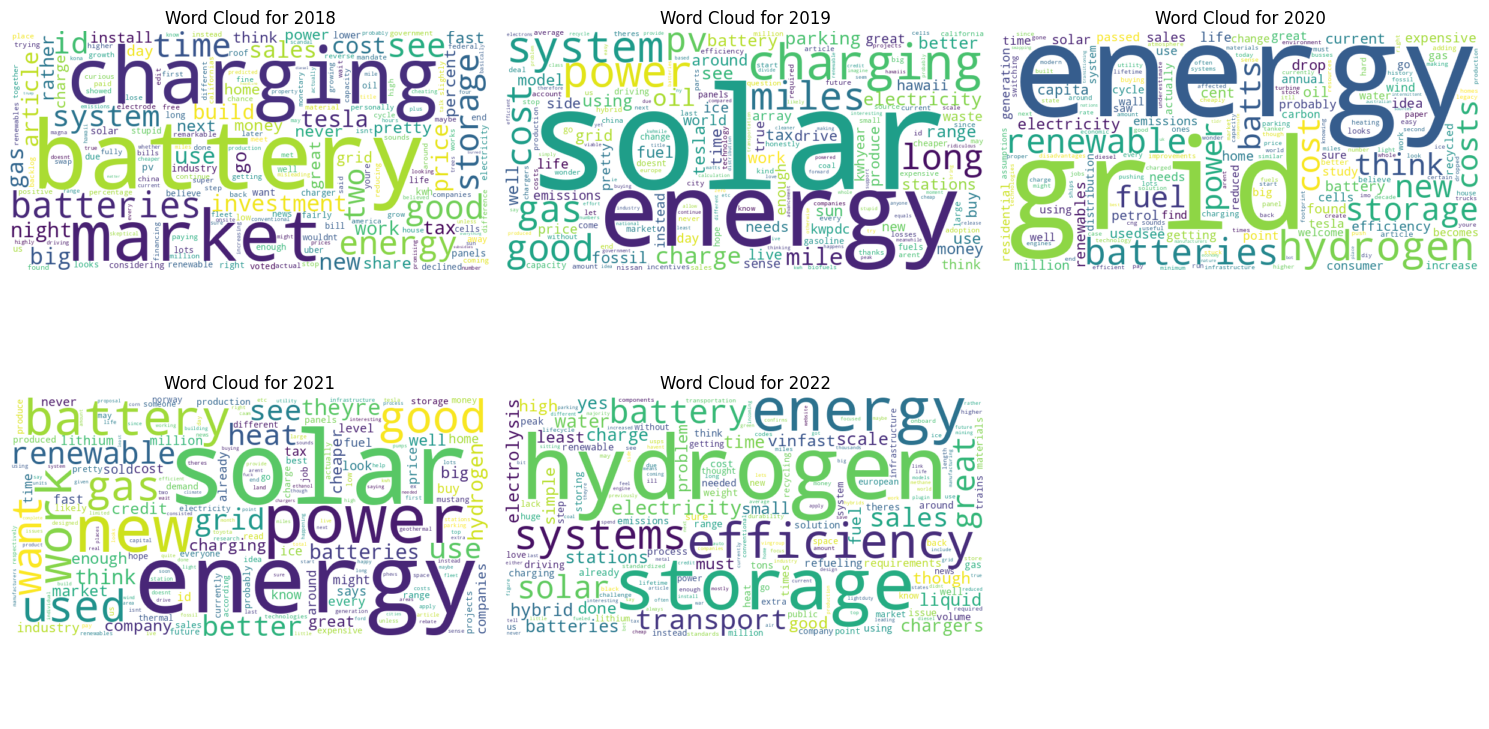

In [106]:
from wordcloud import WordCloud


def generate_wordcloud(word_frequencies, ax, year):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {year}')




fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Generate and display word clouds for each year
for i, year in enumerate(range(2018, 2023)):
    ax = axs[i // 3, i % 3]  # Determine the position of the subplot
    generate_wordcloud(updated_word_frequencies_by_year[year], ax, year)

# Hide the 6th subplot (as we have only 5 years of data)
axs[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [107]:


data_for_df = []

for year in updated_word_frequencies_by_year:
    most_common_words = updated_word_frequencies_by_year[year].most_common(5)
    for word, freq in most_common_words:
        data_for_df.append({'Year': year, 'Word': word, 'Frequency': freq})

# Create the DataFrame
top_words_df = pd.DataFrame(data_for_df)

# Display the DataFrame
print(top_words_df)


    Year        Word  Frequency
0   2018     battery         15
1   2018    charging         10
2   2018      market          8
3   2018   batteries          7
4   2018      energy          6
5   2019       solar         18
6   2019      energy         14
7   2019    charging         14
8   2019      system         11
9   2019       power         11
10  2020      energy         17
11  2020        grid         16
12  2020    hydrogen         13
13  2020   batteries         10
14  2020   renewable          9
15  2021       solar         34
16  2021      energy         30
17  2021       power         21
18  2021         new         19
19  2021     battery         17
20  2022    hydrogen         35
21  2022     storage         22
22  2022      energy         15
23  2022  efficiency         15
24  2022     systems         11


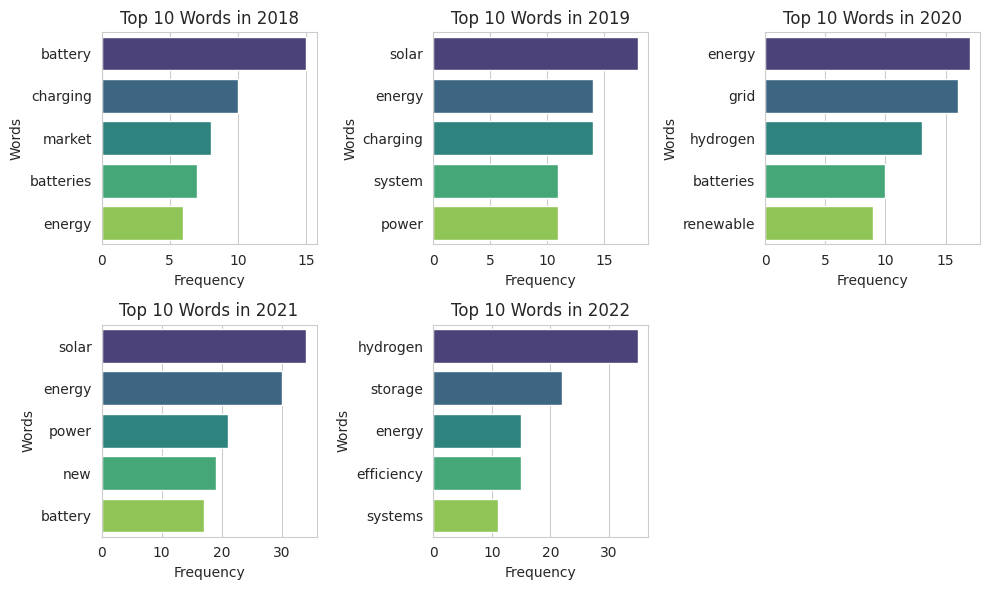

In [108]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the grid size
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 6))  # Adjust the overall figure size here

# Iterate through each year and plot
for i, year in enumerate(range(2018, 2023)):
    ax = axs[i // n_cols, i % n_cols]
    year_data = top_words_df[top_words_df['Year'] == year]
    sns.barplot(x='Frequency', y='Word', data=year_data, palette="viridis", ax=ax)
    ax.set_title(f'Top 10 Words in {year}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')

# Hide the empty subplot (if any)
if len(range(2018, 2023)) % n_cols != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()

## **3.5 The sentiment of Battery Discussion**

The DataFrame cleaned_comment_df is filtered to include comments that contain keywords related to batteries, such as 'battery', 'recycling', 'charging', etc. This creates a new DataFrame, battery_df, focusing on conversations specifically about battery-related aspects of electric vehicles.

**Sentiment of Baterry-related Posts:**

The sentiment of each battery-related comment is analyzed using the get_sentiment_score function, which calculates a compound sentiment score.
This data, including the year, post title, URL, and sentiment score, is compiled into battery_sentiment_data and then converted into a DataFrame battery_sentiment_df.

The average sentiment score for each year is calculated from battery_sentiment_df, providing a yearly overview of the general sentiment toward battery-related topics.


**Visualization of Sentiment Over Time**:

A line plot is generated to visualize the average sentiment scores over the years. This plot includes markers for each year and labels for clarity.

**Interpretation of the Sentiment Output:**

The average sentiment scores from 2018 to 2022 indicate an overall positive and increasing trend in sentiment towards battery-related topics.
In 2018, the average sentiment score was relatively low at 0.126914, suggesting more neutral or mixed feelings.
From 2019 to 2022, there's a steady increase in positivity, with scores rising from 0.181452 in 2019 to 0.358442 in 2022.
This upward trend could reflect growing optimism or positive reception towards advancements in battery technology, recycling efforts, and charging solutions in the EV space. These findings provide valuable insights into how public sentiment regarding battery-related issues in EVs has evolved, highlighting increasing positivity, which could be influenced by technological advancements and environmental awareness.


**Identifying Top Positive and Negative Comments:**

For each year, the top five positive and negative comments are identified based on their sentiment scores. These are then formatted and stored in top_battery, which is converted into a DataFrame top_battery_df for display.










In [116]:
battery_keywords = ['battery', 'batteries', 'recycling', 'recycle', 'reuse', 'charging', 'charge', 'charger', 'chargers']
battery_df = cleaned_comment_df[cleaned_comment_df['Cleaned Comment'].str.contains('|'.join(battery_keywords), case=False, na=False)]
battery_df

,Year,Post Title,Post URL,Parent Comment,Cleaned Comment
19,2018,The Tokyo metropolitan government plans to boo...,https://www.reddit.com/r/RenewableEnergy/comme...,1.5 million yen to install a charging device?\...,million yen install charging device first orde...
22,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,How much compensation for EVs that lose their ...,much compensation evs lose battery charge seve...
23,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,If done intelligently vehicle to grid storage ...,done intelligently vehicle grid storage found ...
25,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,The study finds significant gains even if EV's...,study finds significant gains even evs dont se...
26,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,Only a moron would let a utility use his batte...,moron would let utility use battery storage
...,...,...,...,...,...
476,2022,Used EV Batteries Could Get a Second Life in C...,https://www.reddit.com/r/RenewableEnergy/comme...,Seems cool but at I wonder about eventual dimi...,seems cool wonder eventual diminishing returns...
485,2022,Toshiba working on a copper plus silicon solar...,https://www.reddit.com/r/RenewableEnergy/comme...,Multiple car companies are trying to do this a...,multiple car companies trying cant figure even...
486,2022,"Solar carport nears completion, city receives ...",https://www.reddit.com/r/RenewableEnergy/comme...,I don't think I'd use that \*that\* often but ...,dont think id use often high speed chargers le...
488,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,>Why transport of hydrogen is presented as maj...,transport hydrogen presented major hurdle some...


In [111]:
battery_sentiment_data = []

# Iterate over each row in the battery_df DataFrame
for index, row in battery_df.iterrows():
    sentiment_score = get_sentiment_score(row['Parent Comment'])
    sentiment_data = {
        'Year': row['Year'],
        'Post Title': row['Post Title'],
        'Post URL': row['Post URL'],
        'Parent Comment': row['Parent Comment'],
        'Cleaned Comment': row['Cleaned Comment'],
        'Sentiment Score': sentiment_score
    }
    battery_sentiment_data.append(sentiment_data)

# Convert the list of dictionaries to a DataFrame
battery_sentiment_df = pd.DataFrame(battery_sentiment_data)

In [112]:
battery_sentiment_df

,Year,Post Title,Post URL,Parent Comment,Cleaned Comment,Sentiment Score
0,2018,The Tokyo metropolitan government plans to boo...,https://www.reddit.com/r/RenewableEnergy/comme...,1.5 million yen to install a charging device?\...,million yen install charging device first orde...,0.4588
1,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,How much compensation for EVs that lose their ...,much compensation evs lose battery charge seve...,-0.4019
2,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,If done intelligently vehicle to grid storage ...,done intelligently vehicle grid storage found ...,0.6486
3,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,The study finds significant gains even if EV's...,study finds significant gains even evs dont se...,0.8316
4,2018,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...,Only a moron would let a utility use his batte...,moron would let utility use battery storage,-0.4939
...,...,...,...,...,...,...
105,2022,Used EV Batteries Could Get a Second Life in C...,https://www.reddit.com/r/RenewableEnergy/comme...,Seems cool but at I wonder about eventual dimi...,seems cool wonder eventual diminishing returns...,0.1655
106,2022,Toshiba working on a copper plus silicon solar...,https://www.reddit.com/r/RenewableEnergy/comme...,Multiple car companies are trying to do this a...,multiple car companies trying cant figure even...,0.7214
107,2022,"Solar carport nears completion, city receives ...",https://www.reddit.com/r/RenewableEnergy/comme...,I don't think I'd use that \*that\* often but ...,dont think id use often high speed chargers le...,0.8625
108,2022,Question about hydrogen fueled vehicles?,https://www.reddit.com/r/RenewableEnergy/comme...,>Why transport of hydrogen is presented as maj...,transport hydrogen presented major hurdle some...,0.9252


In [113]:
# Group by 'Year'
average_sentiment_per_year = battery_sentiment_df.groupby('Year')['Sentiment Score'].mean()


print(average_sentiment_per_year)

Year
2018    0.126914
2019    0.181452
2020    0.306847
2021    0.326263
2022    0.358442
Name: Sentiment Score, dtype: float64


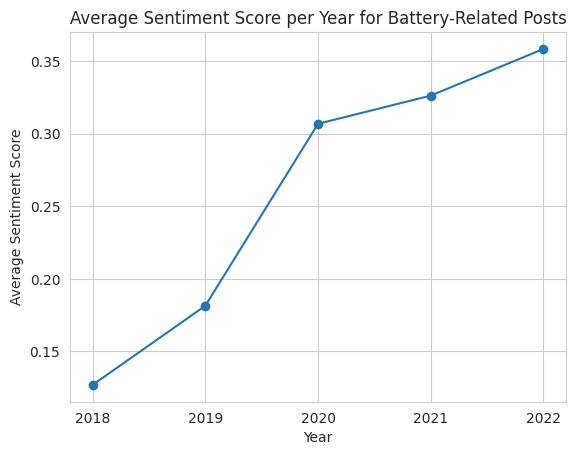

In [114]:



average_sentiment_per_year.plot(kind='line', marker='o')  # 'marker' is optional, adds a point for each year

# Set x-axis ticks to whole years only
plt.xticks(average_sentiment_per_year.index, average_sentiment_per_year.index)

# Adding labels and title for clarity
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score per Year for Battery-Related Posts')

# Show the plot
plt.show()


In [115]:


top_battery = []

years = battery_sentiment_df['Year'].unique()

for year in years:
    year_df = battery_sentiment_df[battery_sentiment_df['Year'] == year]

    # Get top 5 positive and negative comments
    top_positive = year_df.sort_values(by='Sentiment Score', ascending=False).head(5)[['Parent Comment', 'Sentiment Score', 'Post Title', 'Post URL']]
    top_negative = year_df.sort_values(by='Sentiment Score').head(5)[['Parent Comment', 'Sentiment Score', 'Post Title', 'Post URL']]


    # Format results
    for index, row in top_positive.iterrows():
        top_battery.append({'Year': year, 'Type': 'Positive', 'Comment': row['Parent Comment'], 'Score': row['Sentiment Score'], 'Post': row['Post Title'], 'URL': row['Post URL']})

    for index, row in top_negative.iterrows():
        top_battery.append({'Year': year, 'Type': 'Negative', 'Comment': row['Parent Comment'], 'Score': row['Sentiment Score'], 'Post': row['Post Title'], 'URL': row['Post URL']})

# Convert summary list to a DataFrame for display
top_battery_df = pd.DataFrame(top_battery)

top_battery_df

,Year,Type,Comment,Score,Post,URL
0,2018,Positive,"I was skeptical from the title, but it sounds ...",0.9201,The Hyundai Kona Electric is the car the entir...,https://www.reddit.com/r/RenewableEnergy/comme...
1,2018,Positive,"Not really, as each charging cycle is reducing...",0.8516,Electric cars can serve as mobile power storag...,https://www.reddit.com/r/RenewableEnergy/comme...
2,2018,Positive,The study finds significant gains even if EV's...,0.8316,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...
3,2018,Positive,I'm so tired of hearing about solid state batt...,0.7184,Who Will Win the Race for an EV Solid-State Ba...,https://www.reddit.com/r/RenewableEnergy/comme...
4,2018,Positive,If done intelligently vehicle to grid storage ...,0.6486,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...
5,2018,Negative,"This is so stupid, you're never far from home ...",-0.6560,Electric vehicles are one of the fastest-growi...,https://www.reddit.com/r/RenewableEnergy/comme...
6,2018,Negative,> Not too shabby considering the on-board stor...,-0.6441,Solar-powered car breaks world record in effic...,https://www.reddit.com/r/RenewableEnergy/comme...
7,2018,Negative,Only a moron would let a utility use his batte...,-0.4939,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...
8,2018,Negative,This is the first car that had turned my gaze ...,-0.4847,The Hyundai Kona Electric is the car the entir...,https://www.reddit.com/r/RenewableEnergy/comme...
9,2018,Negative,How much compensation for EVs that lose their ...,-0.4019,Electric vehicles could save billions on energ...,https://www.reddit.com/r/RenewableEnergy/comme...


# **4. Discussion and Conclusion**



## **4.1 Discussion of Research Questions and Hypothesis**



### **Research Question 1:  What are the most frequently discussed topics related to EVs?**

Hypothesis 1: Most frequently discussed topics related to EVs should focus on technological advancements.



To answer research question 1, I carried out analysis in 2 aspects:
1. Topic Modeling of Post Titles:
      
  The application of LDA for topic modeling on Reddit post titles has provided a dynamic overview of the evolving themes in EV discussions from 2018 to 2022. Since the EV related posts of the renewablenergy subreddit are mostly made up of news article sharing, an anslysis of post titles can reveal users' interested topics (post titles are normally news article title that are really straightforward and summarize the article content).
  
  The key findings include:
  
  A consistent emphasis on 'energy', 'battery', and 'charging' across the years. An increasing focus on specific forms of energy, particularly 'solar', in the later years (2021 and 2022). The introduction of political dimensions in 2022 is indicated by the prominence of 'Biden' in the discussions, which is reasonable as Biden issued IRA since 2022. These results showcase a clear trajectory from foundational EV topics towards broader energy concerns and the integration of political aspects.

2. Word Frequency in Parent Comments:
  
  The word frequencies and visualizations via word clouds and bar plots reveal significant trends:
  
  Initial discussions in 2018 centered on 'battery', 'charging', and 'market', reflecting a technical and commercial focus on EVs. The gradual inclusion of broader renewable energy themes, such as 'solar', 'energy', and 'grid', in subsequent years points to an expanding discourse. By 2021 and 2022, the emergence of words like 'hydrogen', 'storage', and 'efficiency' highlights growing interest in diverse energy solutions and the efficiency of EV technologies.

In conclusion, the analysis indicates that the public discourse on Reddit has a primary focus on EV-specific technologies. While comments contents and posts titles have some nuanced difference, the focus of renewable energy like hydrogen and solar are increasing and the energy storage solutions including battery and charging and technology efficiency are also heated topics. Those discussion topics validates Hypothesis 1 to a certain degree. But my initial hypothesis is not comprehensive, as these topics also mirrors the global transition towards more comprehensive and sustainable energy solutions for adopting more EVs and include political elements in recent years' posts sharing further signifies the growing intersection of EV technology with broader socio-political dynamics, emphasizing its relevance in public policy and societal discourse.


### **Research Question 2:  How has public sentiment towards electric vehicles evolved from 2018 to 2022?**
Hypothesis 2: The public sentiment towards EVs has become increasingly positive over the years from 2018 to 2022.


The sentiment analysis demonstrates an overall positive trajectory from 2018 to 2022, with a slight dip in recent years. This almost aligns with Hypothesis 2, suggesting a generally growing optimism about EVs, tempered by realistic assessments and emerging challenges in later years, likely the challenge of demand and supply of battery for EV production and increasing amount of policies and initiatives such as IRA.





### **Research Question 3:  How battery and battery recycling are perceived within the larger conversation about EVs?**
Hypothesis 3: Battery and battery recycling are expected to be hot topics within the discussion and associated with relatively positive emotions.

The increasing sentiment scores in discussions related to batteries and recycling underscore a growing optimism. This could be attributed to advancements in battery technology, improved recycling methods, and the increasing viability of batteries in long-term EV usage. Batteries are a central component of EVs, and their efficiency, lifespan, and environmental impact are crucial for the broader acceptance of EVs. The heightened positive sentiment may reflect confidence in overcoming some of the primary barriers to EV adoption, such as battery life and recycling solutions. These findings support Hypothesis 3, which anticipated that battery and recycling would be significant and positively viewed topics in EV discussions.


## **Challenges Encountered**
The project encountered challenges in data processing, primarily in refining the analysis to yield meaningful insights. Initial word frequency results were skewed by generic EV terms and common words, necessitating the creation of an extended list of stopwords. This iterative approach was crucial in sharpening the focus of the analysis and avoiding misleading conclusions.

In addition, the initial topic modling process did not include random seeds, making top words across topics all different every time. This is because LDA is a probabilistic model that includes random processes in its calculations. In LDA, topics are initially assigned to documents randomly. The algorithm then iteratively refines these topics based on the words in the documents. Due to this random starting point, different runs can lead to different topic compositions. To make the results more consistent across runs, I set a random seed. A random seed ensures that the random processes within the LDA algorithm start from the same point each time, leading to more reproducible results.


## **Limitations and Future Directions**
One significant limitation is the sentiment analysis tool's inability to accurately interpret nuances like metaphor or sarcasm. Future research could integrate more advanced natural language processing techniques or contextual analysis to overcome this.

Additionally, the study's reliance on Reddit data, while rich and diverse, may not fully capture the broader public sentiment, given Reddit's unique user demographics and culture. Expanding the data sources to include other social media platforms and forums could offer a more holistic view.

Furthermore, the study's temporal scope, ending in 2022, limits its ability to capture ongoing developments in the EV sector. Continued research, especially in rapidly evolving areas like battery technology, would provide more current insights.

In conclusion, this study offers a valuable snapshot of public discourse and sentiment surrounding EVs, highlighting the dynamic interplay between technological advancements, environmental considerations, and public opinion. The insights gleaned here can inform policymakers and industry stakeholders, guiding future strategies and initiatives in the EV and renewable energy sectors.

